In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from src.Gates import PauliGate, PauliExpression

Approach I) Form graph w. edges between non-commuting terms and perform graph coloring - https://arxiv.org/pdf/1907.07859.pdf
Approach II) Form graph w. edges between commuting terms and perform minimum-clique cover - https://arxiv.org/pdf/1907.13623.pdf

In [214]:
term= 'xy'
obj = PauliGate(name=term)
obj.matrix()

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
       [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
       [0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
       [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [6]:
expression = 'zz+zz+yy-zy+xy+xx'
obj = PauliExpression(expression=expression)
obj.terms()

{0: 'zz',
 1: 'zz',
 2: 'yy',
 3: 'zy',
 4: 'xy',
 5: 'xx',
 6: 'xy',
 7: 'zi',
 8: 'yz',
 9: 'ii',
 10: 'xx',
 11: 'yy',
 12: 'yi',
 13: 'iy',
 14: 'zz'}

In [7]:
obj.commutator_map()

{(0, 1): True,
 (0, 2): True,
 (0, 3): False,
 (0, 4): True,
 (0, 5): True,
 (0, 6): True,
 (0, 7): True,
 (0, 8): False,
 (0, 9): True,
 (0, 10): True,
 (0, 11): True,
 (0, 12): False,
 (0, 13): False,
 (0, 14): True,
 (1, 2): True,
 (1, 3): False,
 (1, 4): True,
 (1, 5): True,
 (1, 6): True,
 (1, 7): True,
 (1, 8): False,
 (1, 9): True,
 (1, 10): True,
 (1, 11): True,
 (1, 12): False,
 (1, 13): False,
 (1, 14): True,
 (2, 3): False,
 (2, 4): False,
 (2, 5): True,
 (2, 6): False,
 (2, 7): False,
 (2, 8): False,
 (2, 9): True,
 (2, 10): True,
 (2, 11): True,
 (2, 12): True,
 (2, 13): True,
 (2, 14): True,
 (3, 4): False,
 (3, 5): True,
 (3, 6): False,
 (3, 7): True,
 (3, 8): True,
 (3, 9): True,
 (3, 10): True,
 (3, 11): False,
 (3, 12): False,
 (3, 13): True,
 (3, 14): False,
 (4, 5): False,
 (4, 6): True,
 (4, 7): False,
 (4, 8): True,
 (4, 9): True,
 (4, 10): False,
 (4, 11): False,
 (4, 12): False,
 (4, 13): True,
 (4, 14): True,
 (5, 6): False,
 (5, 7): False,
 (5, 8): True,
 (5, 

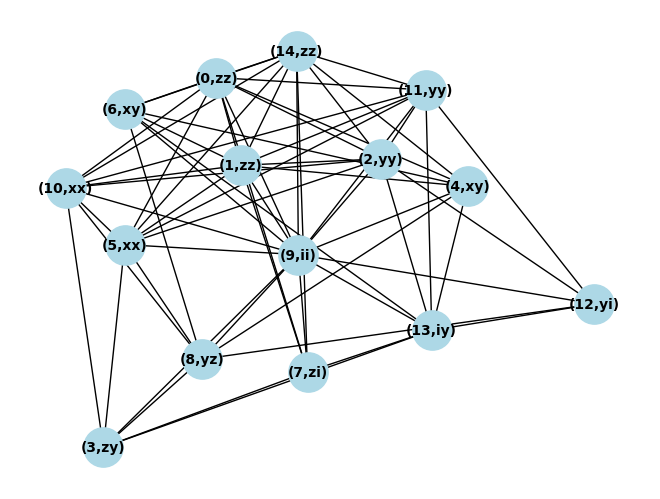

In [8]:
G = nx.Graph()
for term_idx, label in obj.terms().items():
    G.add_node(node_for_adding='('+str(term_idx)+','+label+')')
for (i,j), are_commutating in obj.commutator_map().items():
    if are_commutating:
        edge_i, edge_j = '('+str(i)+','+obj.terms()[i]+')', '('+str(j)+','+obj.terms()[j]+')'
        G.add_edge(u_of_edge=edge_i,v_of_edge=edge_j)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_size=10, font_weight='bold')
plt.show()

In [9]:
# Create complement graph
complement_graph = nx.complement(G)

# Find graph coloring
coloring = nx.coloring.greedy_color(complement_graph,strategy="largest_first")

# Organize nodes by color (each color class is a clique in the original graph)
clique_cover = {}
for node, color in coloring.items():
    if color in clique_cover:
        clique_cover[color].append(node)
    else:
        clique_cover[color] = [node]

# The values of clique_cover are the cliques
min_clique_cover = list(clique_cover.values())
print(min_clique_cover)

[['(12,yi)', '(8,yz)', '(9,ii)'], ['(3,zy)', '(7,zi)', '(13,iy)'], ['(4,xy)', '(6,xy)', '(0,zz)', '(1,zz)', '(14,zz)'], ['(2,yy)', '(5,xx)', '(10,xx)', '(11,yy)']]
